# Kernel Ridge Regression (KRR) Tutorial with scikit-learn
_A tutorial using the California Housing dataset_

Author: Shrey Nayak

---

## Objectives
- Understand the theory behind **Kernel Ridge Regression**.
- Learn how KRR combines **Ridge Regression** and the **Kernel Trick**.
- Implement KRR with Linear, Polynomial, and RBF kernels.
- Compare KRR to Linear Regression.
- Perform basic hyperparameter tuning.


## 1. Introduction to Kernel Ridge Regression

**Kernel Ridge Regression (KRR)** combines:
1. **Ridge Regression**: A linear regression model with **L2 regularization** to reduce overfitting.
2. **Kernel Trick**: Transforms the data into a higher-dimensional feature space without explicitly computing the transformation.

This allows KRR to:
- Solve **linear** problems robustly (via Ridge Regression).
- Solve **non-linear** problems (via kernels like RBF, Polynomial).

---

## 2. Mathematical Formulation

Ridge Regression solves:
$$
\min_w \|y - Xw\|^2 + \alpha \|w\|^2
$$

Kernel Ridge Regression applies the **kernel trick**:
- Replace $X$ with a **kernel matrix** $K$ where $K_{ij} = k(x_i, x_j)$.
- Solve:
$$
\hat{y} = K (K + \alpha I)^{-1} y
$$

Here:
- $\alpha$: Regularization parameter.
- $k(\cdot, \cdot)$: Kernel function.

---

## 3. Kernels in KRR
- **Linear Kernel**: $k(x, x') = x \cdot x'$
- **Polynomial Kernel**: $k(x, x') = (\gamma x \cdot x' + r)^d$
- **RBF Kernel**: $k(x, x') = \exp(-\gamma \|x - x'\|^2)$

---

## 4. Advantages
- Handles both linear and non-linear patterns.
- Can model complex relationships without explicit feature engineering.
- Regularization reduces overfitting.

---

## 5. Limitations
- Computationally expensive for large datasets (kernel matrix is $n \times n$).
- Requires careful tuning of hyperparameters (alpha, gamma, degree).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Show first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)

Summary statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532 

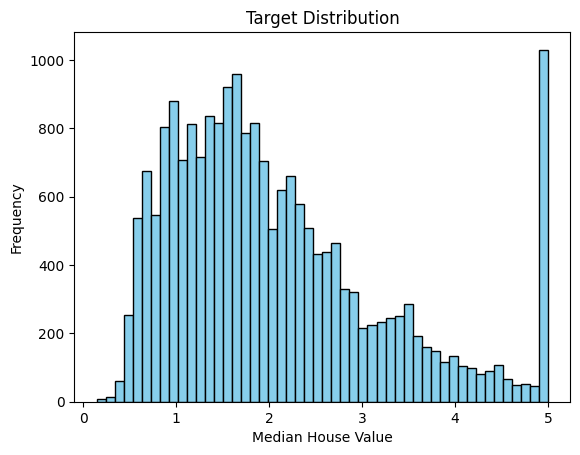

In [3]:
print("Dataset shape:", df.shape)
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Target distribution
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Target Distribution")
plt.show()


In [4]:
# Features & target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization (important for kernel methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# KRR with Linear Kernel
krr_linear = KernelRidge(kernel='linear', alpha=1.0)
krr_linear.fit(X_train_scaled, y_train)
y_pred_linear = krr_linear.predict(X_test_scaled)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"KRR Linear -> RMSE: {rmse_linear:.3f}, R²: {r2_linear:.3f}")


KRR Linear -> RMSE: 2.205, R²: -2.711


In [6]:
# KRR with Polynomial Kernel
krr_poly = KernelRidge(kernel='polynomial', alpha=1.0, degree=3, gamma=0.1)
krr_poly.fit(X_train_scaled, y_train)
y_pred_poly = krr_poly.predict(X_test_scaled)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"KRR Polynomial -> RMSE: {rmse_poly:.3f}, R²: {r2_poly:.3f}")


KRR Polynomial -> RMSE: 3.448, R²: -8.075


In [7]:
# KRR with RBF Kernel
krr_rbf = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)
krr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = krr_rbf.predict(X_test_scaled)

rmse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf = r2_score(y_test, y_pred_rbf)

print(f"KRR RBF -> RMSE: {rmse_rbf:.3f}, R²: {r2_rbf:.3f}")


KRR RBF -> RMSE: 0.600, R²: 0.725


In [8]:
# Standard Ridge Regression (baseline)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Compare results
results = pd.DataFrame({
    'Model': ['Ridge', 'KRR Linear', 'KRR Polynomial', 'KRR RBF'],
    'RMSE': [rmse_ridge, rmse_linear, rmse_poly, rmse_rbf],
    'R²': [r2_ridge, r2_linear, r2_poly, r2_rbf]
})
results


,Model,RMSE,R²
0,Ridge,0.745557,0.575816
1,KRR Linear,2.205271,-2.711224
2,KRR Polynomial,3.448389,-8.074562
3,KRR RBF,0.600018,0.725261


In [9]:
# Grid Search for best hyperparameters
param_grid = {
    'alpha': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    KernelRidge(kernel='rbf'),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1, 'gamma': 0.1}
Best CV R²: 0.7516845509241371


## Conclusion

- **Kernel Ridge Regression** combines the regularization of Ridge Regression with the power of kernels to capture complex patterns.
- **Linear Kernel**: Similar to Ridge Regression.
- **Polynomial Kernel**: Captures polynomial relationships but may overfit.
- **RBF Kernel**: Very flexible, often best for non-linear patterns.
- Hyperparameter tuning is crucial for good performance.

**Advantages:**
- Handles both linear and non-linear data.
- Built-in regularization.
- Flexible through kernel choice.

**Limitations:**
- Computationally expensive for large datasets.
- Sensitive to kernel and parameter selection.

**Next Steps:**
- Test on smaller subsets for faster training.
- Compare with SVR, Random Forest, and Gradient Boosting models.
